### Q21. 
- Write functions that compute the RBF kernel kRBF(σ)(x,x′) = exp􏰁−∥x−x′∥2/􏰁2σ2􏰂􏰂 and the polynomial kernel kpoly(a,d)(x, x′) = (a + ⟨x, x′⟩)d. The linear kernel klinear(x, x′) = ⟨x,x′⟩, has been done for you in the support code. Your functions should take as input two matrices W ∈ Rn1×d and X ∈ Rn2×d and should return a matrix M ∈ Rn1×n2 where Mij = k(Wi·, Xj·). In words, the (i, j)’th entry of M should be kernel evaluation between wi (the ith row of W) and xj (the jth row of X). For the RBF kernel, you may use the scipy function cdist(X1,X2,’sqeuclidean’) in the package scipy.spatial.distance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.spatial import distance
import functools

%matplotlib inline

In [2]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    dis = distance.cdist(X1, X2, 'euclidean')
    return np.exp(-dis ** 2 / (2 * sigma ** 2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return (offset + linear_kernel(X1, X2)) ** degree

### Q22. 
- Use the linear kernel function defined in the code to compute the kernel matrix on the set of points x0 ∈ DX = {−4, −1, 0, 2}. Include both the code and the output.

In [3]:
x = [-4, -1, 0, 2]
kernel_matrix = np.zeros((len(x), len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        kernel_matrix[i,j] = linear_kernel(x[i], x[j])

print(kernel_matrix)

[[16.  4.  0. -8.]
 [ 4.  1.  0. -2.]
 [ 0.  0.  0.  0.]
 [-8. -2.  0.  4.]]


### Q23. 
- Suppose we have the data set DX,y = {(−4, 2), (−1, 0), (0, 3), (2, 5)} (in each set of paren- theses, the first number is the value of xi and the second number the corresponding value of the target yi). Then by the representer theorem, the final prediction function will be in the span of the functions x 􏰀→ k(x0, x) for x0 ∈ DX = {−4, −1, 0, 2}. This set of functions will look quite different depending on the kernel function we use. The set of functions x 􏰀→ klinear(x0, x) for x0 ∈ X and for x ∈ [−6, 6] has been provided for the linear kernel. 

(a) Plot the set of functions x 􏰀→ kpoly(1,3)(x0, x) for x0 ∈ DX and for x ∈ [−6, 6].   
(b) Plot the set of functions x 􏰀→ kRBF(1)(x0, x) for x0 ∈ X and for x ∈ [−6, 6].

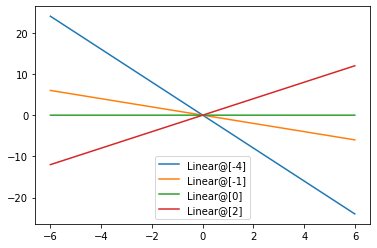

In [4]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

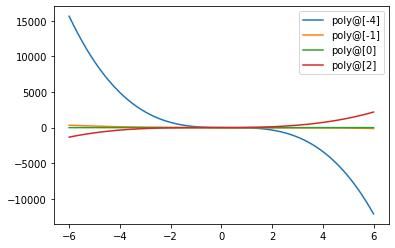

In [5]:
# a) PLot poly machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
offset = 1
degree = 3

# Plot kernel
y = polynomial_kernel(prototypes, xpts, offset, degree) 
for i in range(len(prototypes)):
    label = "poly@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

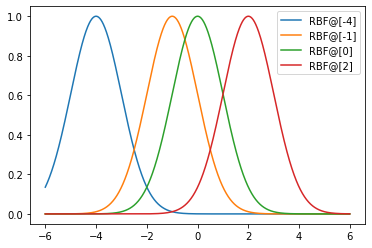

In [6]:
# b) PLot RBF machine functions

plot_step = .01
sigma = 1
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Plot kernel
y = RBF_kernel(prototypes, xpts, sigma) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

### Q24. 
- By the representer theorem, the final prediction function will be of the form f(x) = 􏰊ni=1 αik(xi,x), where x1,...,xn ∈ X are the inputs in the training set. We will use the class Kernel Machine in the skeleton code to make prediction with different kernels.


- Complete the predict function of the class Kernel Machine. Construct a Kernel Machine object with the RBF kernel (sigma=1), with prototype points at −1,0,1 and correspond- ing weights αi 1, −1, 1. Plot the resulting function.

In [7]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        # TODO
        preds = np.dot(self.weights.T, self.kernel(self.training_points, X))
        
        return preds.T

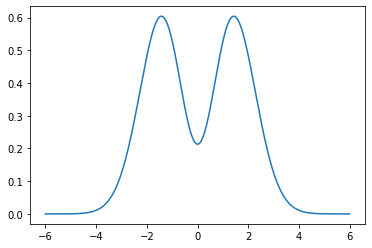

In [8]:
# Plotting the result function

plot_step = .01
sigma = 1
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)

k = functools.partial(RBF_kernel, sigma=sigma)
k_machine = Kernel_Machine(k, prototypes, weights)

plt.plot(xpts, k_machine.predict(xpts))
plt.show() 

### Q25. 
- Plot the training data. You should note that while there is a clear relationship between x and y, the relationship is not linear.

Ans) Plotting the train data below. We can see that while there is a clear relationship between x and y, the relationship is not linear.

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [9]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

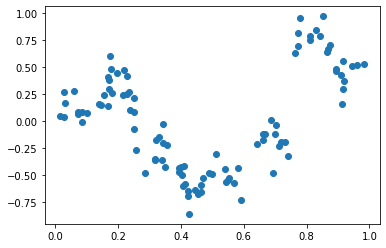

In [10]:
plt.plot(x_train, y_train, 'o')
plt.show()

### Q26. 
- In a previous problem, we showed that in kernelized ridge regression, the final prediction function is f(x) = 􏰊ni=1 αik(xi, x), where α = (λI + K)−1y and K ∈ Rn×n is the kernel matrix of the training data: Kij = k(xi,xj), for x1,...,xn. In terms of kernel machines, αi is the weight on the kernel function evaluated at the training point xi. Complete the function train kernel ridge regression so that it performs kernel ridge regression and returns a Kernel Machine object that can be used for predicting on new points.


In [11]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    alpha = np.dot(np.linalg.inv(l2reg * np.identity(X.shape[0]) + kernel(X, X)), y)
    return Kernel_Machine(kernel, X, alpha)

### Q27.
- Use the code provided to plot your fits to the training data for the RBF kernel with a fixed regularization parameter of 0.0001 for 3 different values of sigma: 0.01, 0.1, and 1.0. What values of sigma do you think would be more likely to over fit, and which less?

Ans)
- Sigma = 0.01 would be most likely to overfit
- Sigma = 1 would be less likely to overfit

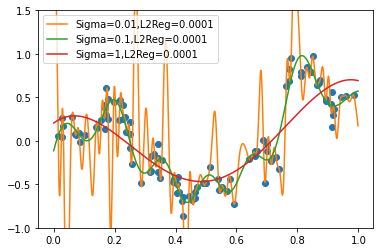

In [12]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

### Q28. 
- Use the code provided to plot your fits to the training data for the RBF kernel with a fixed sigma of 0.02 and 4 different values of the regularization parameter λ: 0.0001, 0.01, 0.1, and 2.0. What happens to the prediction function as λ → ∞?

Ans) When λ → ∞ (In my example, λ = 20000), the prediction function is a straight line ovelapped with x axis

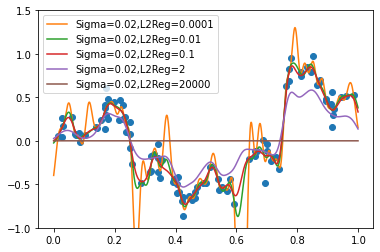

In [13]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2, 20000]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

### Q29. 
- {BONUS} Find the best hyperparameter settings (including kernel parameters and the regularization parameter) for each of the kernel types. Summarize your results in a table, which gives training error and test error for each setting. Include in your table the best settings for each kernel type, as well as nearby settings that show that making small change in any one of the hyperparameters in either direction will cause the performance to get worse. You should use average square loss on the test set to rank the parameter settings. To make things easier for you, we have provided an sklearn wrapper for the kernel ridge regression function we have created so that you can use sklearn’s GridSearchCV. Note: Because of the small dataset size, these models can be fit extremely fast, so there is no excuse for not doing extensive hyperparameter tuning.

In [14]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        return(((self.predict(X)-y)**2).mean()) 

In [15]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [16]:
param_grid = [{'kernel': ['RBF'],'sigma':[0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.070 ], \
               'l2reg': [0.115, 0.117, 0.119, 0.121, 0.123, 0.125, 0.127, 0.129, 0.131, 0.133, 0.135]},
              {'kernel':['polynomial'],'offset':[-5, -4, -3, -2, -1, 0, 1, 0, 1, 2, 3, 4, 5], \
               'degree':[1,2,3,4,5,6,7,8,9,10],'l2reg':[0.005, 0.006, 0.007, 0.008, 0.009, 0.01] },
              {'kernel':['linear'],'l2reg': [10,9,8,7,6,5,4,3,2,1,0.1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': [0.115, 0.117, 0.119, 0.121, 0.123, 0.125,
                                    0.127, 0.129, 0.131, 0.133, 0.135],
                          'sigma': [0.06, 0.061, 0.062, 0.063, 0.064, 0.065,
                                    0.066, 0.067, 0.068, 0.069, 0.07]},
                         {'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'kernel': ['polynomial'],
                          'l2reg': [0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
                          'offset': [-5, -4, -3, -2, -1, 0, 1, 0, 1, 2, 3, 4,
                                     5]},
                         {'kernel': ['linear'],
                          'l2reg': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_err

In [17]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
80,-,RBF,0.129,-,0.063,0.013808,0.014452
91,-,RBF,0.131,-,0.063,0.013808,0.014474
69,-,RBF,0.127,-,0.063,0.013808,0.014429
102,-,RBF,0.133,-,0.063,0.013808,0.014497
58,-,RBF,0.125,-,0.063,0.013809,0.014407
...,...,...,...,...,...,...,...
710,8,polynomial,0.008,-1,-,0.471731,0.337790
892,10,polynomial,0.010,-1,-,0.516987,0.353146
671,8,polynomial,0.005,-1,-,1.141505,0.689108
697,8,polynomial,0.007,-1,-,1.296353,0.866005


#### Linear kernel: The best hyperparameter for linear kernel is param_l2reg = 4
- By firstly checking basic results, param_l2reg = 1 had good result. 
- When I added more parameters to check the best hyperparameter(1~10), I found param_l2reg = 4 as an optimal value.
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [18]:
df_toshow[df_toshow['param_kernel'] == 'linear'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
907,-,linear,4.00,-,-,0.164510,0.206563
908,-,linear,3.00,-,-,0.164512,0.206538
906,-,linear,5.00,-,-,0.164513,0.206592
905,-,linear,6.00,-,-,0.164521,0.206625
909,-,linear,2.00,-,-,0.164522,0.206518
904,-,linear,7.00,-,-,0.164534,0.206661
910,-,linear,1.00,-,-,0.164540,0.206506
903,-,linear,8.00,-,-,0.164550,0.206699
911,-,linear,0.10,-,-,0.164565,0.206501
912,-,linear,0.01,-,-,0.164569,0.206501


#### RBF kernel: The best hyperparameter for RBF kernel: param_sigma = 0.063, param_l2reg = 0.129
- By firstly checking basic results, param_l2reg = 0.0625, param_sigma = 0.1 had good result. 


- Param_sigma: When I applied 0.01 ~ 0.1 (+0.01), I decided to check close range of 0.06~0.07
- By checking more close range, I found 0.062 ~ 0.064 as a good result range


- Param_l2reg: When I applied 2 ** -5 ~ 2 ** 5 (+1), I found 0.1250 had good results.
- When applying more close range (0.115 ~ 0.135 (+0.002)), I found 0.127 ~ 0.133 as a good result range


- By combining both, I found param_sigma = 0.063, param_l2reg = 0.129 as an optimal value.
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [19]:
df_toshow[df_toshow['param_kernel'] == 'RBF'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
80,-,RBF,0.129,-,0.063,0.013808,0.014452
91,-,RBF,0.131,-,0.063,0.013808,0.014474
69,-,RBF,0.127,-,0.063,0.013808,0.014429
102,-,RBF,0.133,-,0.063,0.013808,0.014497
58,-,RBF,0.125,-,0.063,0.013809,0.014407
...,...,...,...,...,...,...,...
76,-,RBF,0.127,-,0.07,0.014306,0.015795
87,-,RBF,0.129,-,0.07,0.014326,0.015830
98,-,RBF,0.131,-,0.07,0.014347,0.015865
109,-,RBF,0.133,-,0.07,0.014367,0.015899


#### Polynomial kernel: The best hyperparameter for Polynomial kernel: 
#### param_degree = 9, param_l2reg = 0.008, param_offset = -3

- param_degree: seeking 1 ~ 10, I found 8 ~ 10 as a good parameter range
- param_l2reg: seeking 0.005 ~ 0.010, I found 0.007~0.009 as a good parameter range
- param_offset: seeking -5 ~ 5, I found -3 ~ -1 as a good parameter range


- By combining all, I found param_degree = 9, param_l2reg = 0.008, param_offset = -3 as an optimal value.
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [20]:
df_toshow[df_toshow['param_kernel'] == 'polynomial'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
786,9,polynomial,0.008,-3,-,0.030211,0.040353
773,9,polynomial,0.007,-3,-,0.030243,0.040048
799,9,polynomial,0.009,-3,-,0.030323,0.040800
760,9,polynomial,0.006,-3,-,0.030361,0.039838
747,9,polynomial,0.005,-3,-,0.030531,0.039695
...,...,...,...,...,...,...,...
710,8,polynomial,0.008,-1,-,0.471731,0.337790
892,10,polynomial,0.010,-1,-,0.516987,0.353146
671,8,polynomial,0.005,-1,-,1.141505,0.689108
697,8,polynomial,0.007,-1,-,1.296353,0.866005


In [21]:
# # Can be a more convenient way to look at the table
# import qgrid 
# # qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
# qgrid.show_grid(df_toshow)

### Q30.
- {BONUS} Plot your best fitting prediction functions using the polynomial kernel and the RBF kernel. Use the domain x ∈ (−0.5, 1.5). Comment on the results.

Ans)   
- Prediction functions using the RBF kernel better fits the data than the polynomial kernel
- For outside of the training points, the polynomial kernel acts very unreasonable.

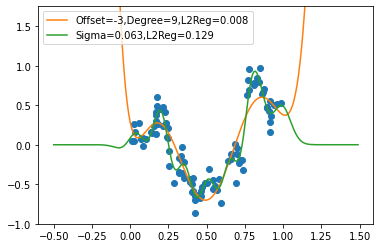

In [22]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -3
degree = 9
l2reg = 0.008
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)

#Plot best RBF fit
sigma = 0.063
l2reg= 0.129
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

# Kernel SVM optional problem

### Q32. 
- Load the SVM training svm-train.txt and svm-test.txt test data from the zip file. Plot the training data using the code supplied. Are the data linearly separable? Quadratically separable? What if we used some RBF kernel?

Ans)
- Above data may not be linearly seperable and quadratically separable. 
- It might get much better solution through RBF kernel

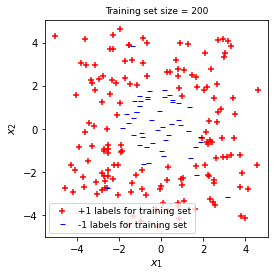

In [23]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

### Q33. 
- Unlike for kernel ridge regression, there is no closed-form solution for SVM classification (kernelized or not). Implement kernelized Pegasos. Because we are not using a sparse representation for this data, you will probably not see much gain by implementing the “optimized” versions described in the problems above.

In [37]:
def train_soft_svm(x_train, y_train, k, l2_reg=0.01):
    alpha = np.zeros(len(x_train))
    kernel = k(x_train, x_train)
    t = 0 # step number
    max_step = 1000
    
    while t < max_step:
        t += 1
        eta = 1 / (t*l2_reg)
        
        j = np.random.randint(1, len(x_train))
        kernel_j = kernel[j, :]
            
        if y_train[j] * (kernel_j.T @ alpha) < 1:
            alpha[j] *= (1 - eta * l2_reg)           
            alpha[j] += eta * y_train[j]
        else:
            alpha[j] *= (1 - eta * l2_reg)     
    
    return Kernel_Machine(k, x_train, alpha)

### Q34.
- Find the best hyperparameter settings (including kernel parameters and the regularization parameter) for each of the kernel types. Summarize your results in a table, which gives training error and test error (i.e. average 0/1 loss) for each setting. Include in your table the best settings for each kernel type, as well as nearby settings that show that making small change in any one of the hyperparameters in either direction will cause the performance to get worse. You should use the 0/1 loss on the test set to rank the parameter settings.

In [38]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [39]:
# converting 1,-1 values into 1, 0
Y_train = np.zeros(len(y_train)).reshape(-1,1)
Y_test = np.zeros(len(y_test)).reshape(-1,1)

idx = 0
for y in y_train:
    if y > 0: Y_train[idx] = 1
    else: Y_train[idx] = 0
    idx += 1
    
idx = 0
for y in y_test:
    if y > 0: Y_test[idx] = 1
    else: Y_test[idx] = 0
    idx += 1      

In [40]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [59]:
param_grid = [{'kernel': ['RBF'],'sigma':[1.116, 1.118, 1.2, 1.202, 1.204, 1.206, 1.208], \
               'l2reg': [0.109, 0.111, 0.113, 0.115, 0.117, 0.119, 0.121, 0.123, 0.125]},
              {'kernel':['polynomial'],'offset':[-5,-4,-3,-2,-1,0,1,2,3,4,5], 'degree':[2,3,4,5,6],\
               'l2reg':[500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500] },
              {'kernel':['linear'],'l2reg': [3400, 3450, 3500, 3550, 3600]}]

kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((Y_train,Y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': [0.109, 0.111, 0.113, 0.115, 0.117, 0.119,
                                    0.121, 0.123, 0.125],
                          'sigma': [1.116, 1.118, 1.2, 1.202, 1.204, 1.206,
                                    1.208]},
                         {'degree': [2, 3, 4, 5, 6], 'kernel': ['polynomial'],
                          'l2reg': [500, 600, 700, 800, 900, 1000, 1100, 1200,
                                    1300, 1400, 1500],
                          'offset': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]},
                         {'kernel': ['linear'],
                          'l2reg': [3400, 3450, 3500, 3550, 3600]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [60]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
4,-,RBF,0.109,-,1.204,0.046384,0.034200
5,-,RBF,0.109,-,1.206,0.046385,0.034261
3,-,RBF,0.109,-,1.202,0.046385,0.034139
6,-,RBF,0.109,-,1.208,0.046385,0.034323
2,-,RBF,0.109,-,1.2,0.046385,0.034077
...,...,...,...,...,...,...,...
285,3,polynomial,1400.000,-3,-,0.895573,0.942424
209,3,polynomial,700.000,-2,-,1.088235,1.025443
296,3,polynomial,1500.000,-3,-,1.880582,1.949127
198,3,polynomial,600.000,-2,-,3.928099,3.796035


#### Linear kernel: The best hyperparameter for linear kernel is param_l2reg = 3450
- When I firstly checked param_l2reg, it seemed to require large number to 
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [61]:
df_toshow[df_toshow['param_kernel'] == 'linear'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
669,-,linear,3450.0,-,-,0.779614,0.757294
668,-,linear,3400.0,-,-,0.779614,0.757267
670,-,linear,3500.0,-,-,0.779614,0.757320
671,-,linear,3550.0,-,-,0.779614,0.757346
672,-,linear,3600.0,-,-,0.779614,0.757371


#### RBF kernel: The best hyperparameter for RBF kernel: param_sigma = 1.204, param_l2reg = 0.109
- By firstly checking basic results, param_l2reg = 0.0625, param_sigma = 0.1 had good result. 


- Param_sigma: By checking more close range as we did on previous questions, I found 0.107 ~ 0.111 as a good result range


- Param_l2reg: By checking more close range as we did on previous questions, I found 1.118 ~ 1.208 as a good result range

- By combining both, I found param_sigma = 1.204, param_l2reg = 0.109 as an optimal value.
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [62]:
df_toshow[df_toshow['param_kernel'] == 'RBF'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
4,-,RBF,0.109,-,1.204,0.046384,0.034200
5,-,RBF,0.109,-,1.206,0.046385,0.034261
3,-,RBF,0.109,-,1.202,0.046385,0.034139
6,-,RBF,0.109,-,1.208,0.046385,0.034323
2,-,RBF,0.109,-,1.2,0.046385,0.034077
...,...,...,...,...,...,...,...
42,-,RBF,0.121,-,1.116,0.046909,0.031993
50,-,RBF,0.123,-,1.118,0.046915,0.032132
49,-,RBF,0.123,-,1.116,0.046932,0.032071
57,-,RBF,0.125,-,1.118,0.046939,0.032209


#### Polynomial kernel: The best hyperparameter for Polynomial kernel: 
#### param_degree = 6, param_l2reg = 800, param_offset = -1

- param_degree: seeking 1 ~ 10, I found 4 ~ 6 as a good parameter range
- param_l2reg: seeking 500~1500, I found 700 ~ 1000 as a good parameter range
- param_offset: seeking -5 ~ 5, I found -1 ~ 1 as a good parameter range


- By combining all, I found param_degree = 6, param_l2reg = 800, param_offset = -1 as an optimal value.
- We can also see that making small change in any one of the hyperparameters in either direction may cause the performance to get worse.

In [74]:
df_toshow[df_toshow['param_kernel'] == 'polynomial'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
584,6,polynomial,800.0,-1,-,0.066145,0.065034
595,6,polynomial,900.0,-1,-,0.066289,0.064769
573,6,polynomial,700.0,-1,-,0.066358,0.065856
597,6,polynomial,900.0,1,-,0.066606,0.060945
606,6,polynomial,1000.0,-1,-,0.066671,0.064797
...,...,...,...,...,...,...,...
285,3,polynomial,1400.0,-3,-,0.895573,0.942424
209,3,polynomial,700.0,-2,-,1.088235,1.025443
296,3,polynomial,1500.0,-3,-,1.880582,1.949127
198,3,polynomial,600.0,-2,-,3.928099,3.796035


### Q35.
- Plot your best fitting prediction functions using the linear, polynomial, and the RBF kernel. The code provided may help.

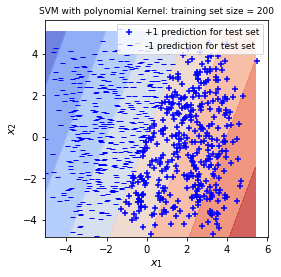

In [68]:
# Linear kernel
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
k = functools.partial(linear_kernel)
f = train_soft_svm(x_train, y_train, k, l2_reg=3450)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with polynomial Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

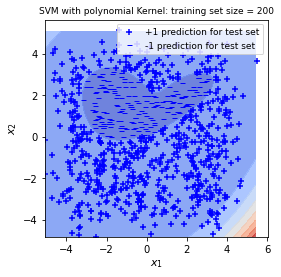

In [47]:
# polynomial kernel

k = functools.partial(polynomial_kernel, offset=-1, degree=6)
f = train_soft_svm(x_train, y_train, k, l2_reg=800)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with polynomial Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

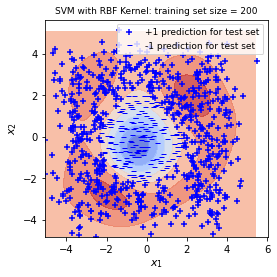

In [66]:
# RBF kernel
k = functools.partial(RBF_kernel, sigma=1.204)
f = train_soft_svm(x_train, y_train, k, l2_reg=0.109)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()